<a href="https://colab.research.google.com/github/sahala-mol/ds-ml/blob/main/sahala_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#Program to implement k-means clustering technique using any standard dataset available in the public domain
#Import the modules and Read the data
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('https://raw.githubusercontent.com/sahala-mol/ds-ml/refs/heads/main/car.csv')
print(df.head())






          Car       Model  Volume  Weight  CO2
0  Mitsubishi  Space Star    1200    1160   95
1       Skoda      Citigo    1000     929   95
2        Fiat         500     900     865   90
3        Mini      Cooper    1500    1140  105
4          VW         Up!    1000     929  105


In [42]:
#Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
print(df.shape)

(32, 5)


In [43]:
print(df.dtypes)

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object


In [44]:
print(df.isnull().sum())

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64


In [45]:
new_df=df[['Volume','Weight','CO2']]
print(new_df.head())

   Volume  Weight  CO2
0    1200    1160   95
1    1000     929   95
2     900     865   90
3    1500    1140  105
4    1000     929  105


In [46]:
import pandas as pd
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=100)
  kmeans.fit(new_df)
  labels = kmeans.predict(new_df)
  silhouette_avg = silhouette_score(new_df, labels)
  sil_scores.append(silhouette_avg)

df_sil_scores = pd.DataFrame({'K': range(2, 11), 'Silhouette Score': sil_scores})
print(df_sil_scores)


    K  Silhouette Score
0   2          0.511088
1   3          0.569304
2   4          0.496892
3   5          0.478325
4   6          0.464557
5   7          0.525962
6   8          0.469754
7   9          0.444389
8  10          0.408325


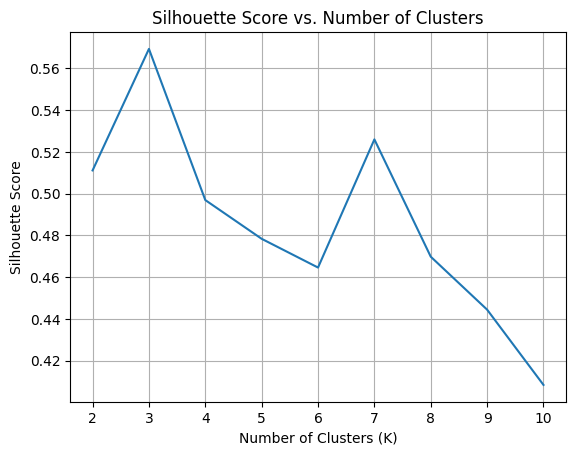

In [47]:
import matplotlib.pyplot as plt

plt.plot(df_sil_scores['K'], df_sil_scores['Silhouette Score'])
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [48]:
# prompt: Clustering the dataset for K = 3 give only the specified code

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(new_df)
labels = kmeans.predict(new_df)
new_df['Cluster'] = labels
print(new_df.head())



   Volume  Weight  CO2  Cluster
0    1200    1160   95        2
1    1000     929   95        2
2     900     865   90        2
3    1500    1140  105        0
4    1000     929  105        2


<ipython-input-48-adae6eef940d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = labels


In [49]:
# prompt: Perform K-Means clustering with n_clusters = 3 and random_state = 10

kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(new_df[['Volume', 'Weight', 'CO2']])  # Fit the model on the relevant columns
labels = kmeans.predict(new_df[['Volume', 'Weight', 'CO2']])
new_df['Cluster'] = labels
print(new_df.head())

   Volume  Weight  CO2  Cluster
0    1200    1160   95        1
1    1000     929   95        1
2     900     865   90        1
3    1500    1140  105        2
4    1000     929  105        1


<ipython-input-49-d74afcfc61eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = labels


In [50]:
# prompt: Fit the model to the scaled_df,Make a series using predictions by K-Means,Create a DataFrame with cluster labels for cluster visualisation

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df[['Volume', 'Weight', 'CO2']])

# Fit the model to the scaled data
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(scaled_df)

# Make a series using predictions by K-Means
cluster_labels = pd.Series(kmeans.labels_, name='cluster')

# Create a DataFrame with cluster labels for cluster visualisation
cluster_df = pd.DataFrame(scaled_df, columns=['Volume', 'Weight', 'CO2'])
cluster_df = pd.concat([cluster_df, cluster_labels], axis=1)

print(cluster_df.head())

     Volume    Weight       CO2  cluster
0 -1.081083 -0.575067 -0.989995        2
1 -1.613309 -1.583822 -0.989995        2
2 -1.879422 -1.863304 -1.684729        2
3 -0.282745 -0.662405  0.399472        1
4 -1.613309 -1.583822  0.399472        2
